In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion

In [17]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        


# Data preprocessing

Load CSV and fill-in the missing values (nan) with the column means

In [2]:
train_data = pd.read_csv('Kaggle-Give-Me-Some-Data/cs-training.csv')
print(train_data.columns)
train_data.drop('Unnamed: 0', axis=1) # delete ranks
print(train_data.columns)
train_data = train_data.fillna(train_data.mean())

# for col in train_data.columns[1:]:
#     mean_value = train_data[col].mean()
#     train_data[col].fillna(value=mean_value, inplace=True)


# Split train and target features
y_train = train_data['SeriousDlqin2yrs']
X = train_data.drop('SeriousDlqin2yrs', axis=1)

# Standardize the train and test sample
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# param = {'C': [10 ** -2, 10 ** -1, 10 ** 0, 10 ** 1, 10 ** 2]}
param = {'C': [5 * (10 ** -4)]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
# gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
# gs_model.fit(X_std, y)

# Train a LR model with best parameters
model = LogisticRegression(C=5 * (10 ** -4), penalty='l1', solver='liblinear')
# **gs_model.best_params_
model.fit(X_std, y_train)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


LogisticRegression(C=0.0005, penalty='l1', solver='liblinear')

In [3]:
coef = model.coef_[0]
coef

array([ 0.        ,  0.        , -0.20223151,  0.09574265,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

Choose 'age' and 'NumberOfTime30-59DaysPastDueNotWorse' features

In [4]:
imp_features = pd.Series(X.columns)[list(coef!=0)]
X_train = X[imp_features]
print(X_train.shape)
print(imp_features)
print(X_train.columns)
print('Redundant Feature Count:', sum(model.coef_[0]==0))
# print('Redundant Feature Names:', list(pd.Series(X.columns)[list(coef==0)]))

(150000, 2)
2                                     age
3    NumberOfTime30-59DaysPastDueNotWorse
dtype: object
Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse'], dtype='object')
Redundant Feature Count: 9


In [5]:
# load test data
test_data = pd.read_csv('Kaggle-Give-Me-Some-Data/cs-test.csv')
print(test_data.columns)
test_data.drop('Unnamed: 0', axis=1) # delete ranks
print(test_data.columns)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [6]:
test_data.isnull().any()

Unnamed: 0                              False
SeriousDlqin2yrs                         True
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

There's NA values in the 'MonthlyIncome' and 'NumberOfDependents' columns, so we need to fill the NA values with colume means.

In [8]:
test_data = test_data.fillna(test_data.mean())
X_test = test_data.drop('SeriousDlqin2yrs', axis=1)
X_test = X_test[imp_features]
print(X_train[:2],'\n', y_train[:2], '\n', X_test[:2], '\n')

   age  NumberOfTime30-59DaysPastDueNotWorse
0   45                                     2
1   40                                     0 
 0    1
1    0
Name: SeriousDlqin2yrs, dtype: int64 
    age  NumberOfTime30-59DaysPastDueNotWorse
0   43                                     0
1   57                                     0 



In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_test = pd.read_csv('Kaggle-Give-Me-Some-Data/sampleEntry.csv')
print( y_train[:2], '\n', y_test[:2], '\n')

0    1
1    0
Name: SeriousDlqin2yrs, dtype: int64 
    Id  Probability
0   1     0.080807
1   2     0.040719 



In [10]:
y_test["Probability"][y_test.Probability<0.5]=0
y_test["Probability"][y_test.Probability>=0.5]=1
y_test = y_test.astype('int32')

C:\Users\wyp\AppData\Local\Temp\ipykernel_1968\3744639221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Probability"][y_test.Probability<0.5]=0
C:\Users\wyp\AppData\Local\Temp\ipykernel_1968\3744639221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Probability"][y_test.Probability>=0.5]=1


In [12]:
y_test = y_test.drop('Id', axis=1)
print(y_train[:2], '\n', y_test[:2], '\n')
print(y_test.shape, y_train.shape)

0    1
1    0
Name: SeriousDlqin2yrs, dtype: int64 
    Probability
0            0
1            0 

(101503, 1) (150000,)


In [13]:
y_test = y_test.to_numpy()
print(type(y_test))

<class 'numpy.ndarray'>


In [14]:
print(y_test.shape)

(101503, 1)


# Train LR, SVM, and Decision Tree
Also, visualize my classifiers using the `plot_decision_regions` function from PML Ch. 3

In [15]:
from sklearn.metrics import accuracy_score
# param = {'C': [10 ** -2, 10 ** -1, 10 ** 0, 10 ** 1, 10 ** 2]}
param = {'C': [5 * (10 ** -4)]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
# gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
# gs_model.fit(X_std, y)

# Train a LR model with best parameters
model = LogisticRegression(C=5 * (10 ** -4), penalty='l1', solver='liblinear')
# **gs_model.best_params_
print(X_train.shape, y_train.shape)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

(150000, 2) (150000,)
Misclassified examples: 176888242
Accuracy: 0.983


In [21]:
X_combined_std = np.vstack([X_train, X_test])
# print(y_train.shape, y_test.shape)
y_test = y_test.reshape(-1)
y_combined = np.hstack([y_train, y_test])
print(X_combined_std.shape, y_combined.shape)

(251503, 2) (251503,)


C:\Users\wyp\AppData\Local\Temp\ipykernel_1968\2275372795.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\wyp\AppData\Local\Temp\ipykernel_1968\2275372795.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


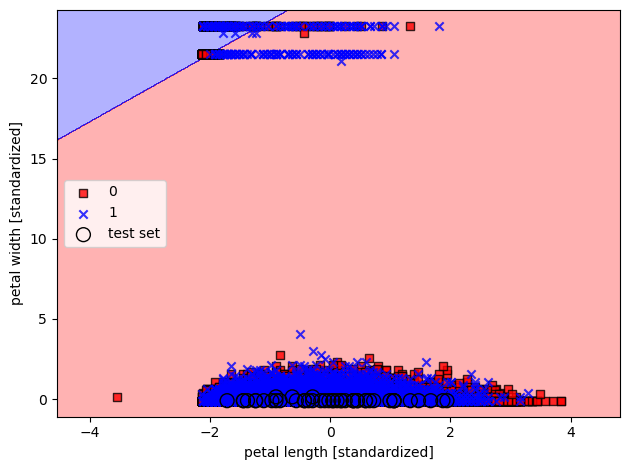

In [24]:
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=model, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='center left')
plt.tight_layout()
plt.savefig('images/lr_classifier_v2.png', dpi=300)
plt.show()

In [25]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [26]:
y_svm_predict = svm.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_svm_predict).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_svm_predict))

Misclassified examples: 1705
Accuracy: 0.983


C:\Users\wyp\AppData\Local\Temp\ipykernel_1968\2275372795.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\wyp\AppData\Local\Temp\ipykernel_1968\2275372795.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


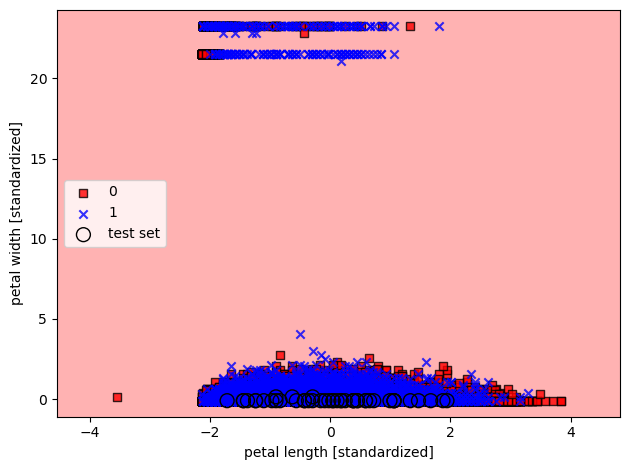

In [27]:
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='center left')
plt.tight_layout()
plt.savefig('images/svm_classifier_v2.png', dpi=300)
plt.show()

In [28]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [29]:
y_dt_pred = tree_model.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_dt_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_dt_pred))

Misclassified examples: 1705
Accuracy: 0.983


C:\Users\wyp\AppData\Local\Temp\ipykernel_1968\2275372795.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\wyp\AppData\Local\Temp\ipykernel_1968\2275372795.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


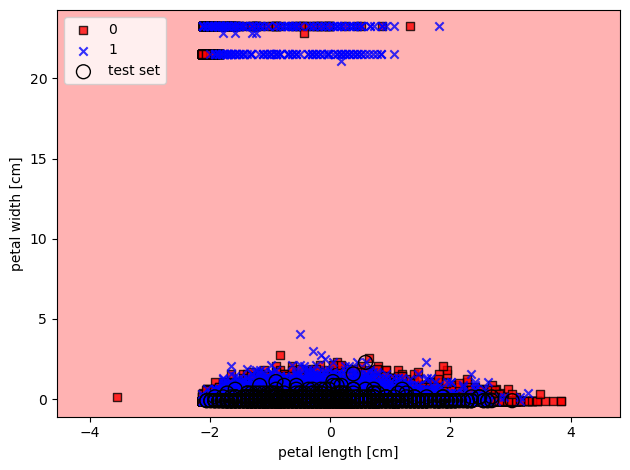

In [32]:
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 1050))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/dt_classifier.png', dpi=300)
plt.show()

## Hyper-parameter Tuning
now start to test different hyper-parameters of LR, SVM, and Decision Tree.

### Logistic Regression
As for LR, I tried C $\in$ [10 ** -2, 10 ** -1, 10 ** 0, 10 ** 1, 10 ** 2]

In [34]:
from sklearn.metrics import accuracy_score
# param = {'C': [10 ** -2, 10 ** -1, 10 ** 0, 10 ** 1, 10 ** 2]}
param = {'C': [5 * (10 ** -4)]}

Cs = [10 ** -2, 10 ** -1, 10 ** 0, 10 ** 1, 10 ** 2]

for _c in Cs:
    lr_model = LogisticRegression(penalty='l1', solver='liblinear')
    # gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
    # gs_model.fit(X_std, y)
    model = LogisticRegression(C=_c, penalty='l1', solver='liblinear')
    # **gs_model.best_params_
    # print(X_train.shape, y_train.shape)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print('Current hyper-paramter (C) is ', _c)
    print('Misclassified examples: %d' % (y_test != y_pred).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Current hyper-paramter (C) is  0.01
Misclassified examples: 1661
Accuracy: 0.984
Current hyper-paramter (C) is  0.1
Misclassified examples: 1661
Accuracy: 0.984
Current hyper-paramter (C) is  1
Misclassified examples: 1661
Accuracy: 0.984
Current hyper-paramter (C) is  10
Misclassified examples: 1661
Accuracy: 0.984
Current hyper-paramter (C) is  100
Misclassified examples: 1661
Accuracy: 0.984


## Support Vector Machine
As it usually takes more than 20 mins to train a svm model on my computer, so I only tried 2 different $\gamma$ values, i.e. 'auto' and 'scale'. As the default choice of $\gamma$ is 'scale', so I use 'auto' in the next code box.

In [35]:
svm = SVC(kernel='linear', C=1.0, random_state=1, gamma='auto')
svm.fit(X_train, y_train)
y_svm_predict = svm.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_svm_predict).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_svm_predict))

Misclassified examples: 1705
Accuracy: 0.983


## Deicision Tree
As for decision tree, I tried depth $\in$ [4, 5, 6].

In [36]:
depth_values = [4, 5, 6]
for dv in depth_values:
    tree_model = DecisionTreeClassifier(criterion='gini', 
                                        max_depth=dv, 
                                        random_state=1)
    tree_model.fit(X_train, y_train)
    y_dt_pred = tree_model.predict(X_test)
    print('Misclassified examples: %d' % (y_test != y_dt_pred).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_dt_pred))

Misclassified examples: 1705
Accuracy: 0.983
Misclassified examples: 1797
Accuracy: 0.982
Misclassified examples: 1629
Accuracy: 0.984
